# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [4]:
test.head()

,title,description,itemid
0,Мастерка,Мастерка фирмы форвард. Белого цвета. В идеаль...,1778449823
1,Зимние сапоги,"Продаю зимние сапоги, в хорошем состоянии, все...",1677656962
2,Видеонаблюдение 8 камер,В комплект Atis AMD-2MIR-8kit входит: /\n1. Ку...,1758182804
3,Запчасти для GLE,Запчасти GLE,1689811299
4,Бластер nerf,Состояние 5+/\nПродаю потому что не нужен/\n18...,1804706240


## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [ ]:
print('Количество пропусков по столбцам')
train.isna().sum()

In [5]:
train['description'] = train['description'].fillna('')
train.isna().sum()

title            0
description      0
Category_name    0
Category         0
dtype: int64

In [10]:
print('Количество пропусков по столбцам')
test.isna().sum()

Количество пропусков по столбцам


title          0
description    1
itemid         0
dtype: int64

In [6]:
test['description'] = test['description'].fillna('')
test.isna().sum()

title          0
description    0
itemid         0
dtype: int64

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [7]:
train['concat'] = train['title'] + ' ' + train['description']

test['concat'] = test['title'] + ' ' + test['description']

## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [13]:
print("Уникальных классов: ",train['Category'].nunique())

Уникальных классов:  50


In [14]:
uniques = pd.DataFrame(train['Category_name'].value_counts())
uniques['Category'] = uniques.index
uniques = uniques.reset_index(drop=True)
uniques['part'] = uniques['Category_name'] / uniques['Category_name'].sum()



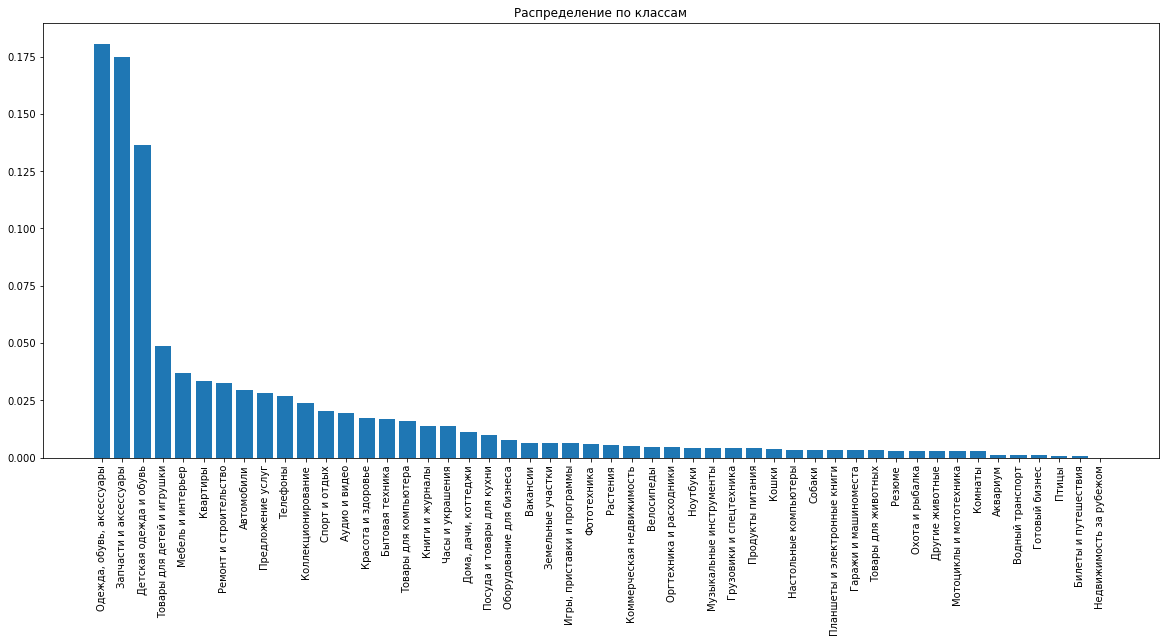

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,8))
plt.bar(uniques['Category'],uniques['part'])
plt.xticks(rotation='vertical')
plt.title('Распределение по классам')
plt.show()

In [16]:
print('Минимальная доля')
print(uniques[['Category','part']][uniques['part']==uniques['part'].min()])
print()
print('Максимальная доля')
print(uniques[['Category','part']][uniques['part']==uniques['part'].max()])

Минимальная доля
                   Category      part
49  Недвижимость за рубежом  0.000039

Максимальная доля
                    Category      part
0  Одежда, обувь, аксессуары  0.180707


Дизбаланс по категориям очень большой

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [33]:
#!pip install nltk

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train['concat'])

In [ ]:
X.shape

## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [ ]:
words = pd.DataFrame(vectorizer.vocabulary_.keys(), columns=['words'])
words['digits'] = 0 
words['puncts'] = 0

In [11]:
for i in range(10):
    words.loc[words['words'].str.startswith(str(i)) == True,'digits'] = 1
print('Кол-во слов начинающихся на цифру: ',words['digits'].sum())

Кол-во слов начинающихся на цифру:  610871


In [21]:
from string import punctuation
for i in list(punctuation):
    words.loc[words['words'].str.startswith(str(i)) == True,'puncts'] = 1
print('Кол-во слов начинающихся на символы пунктуации: ',words['puncts'].sum())
    

Кол-во слов начинающихся на символы пунктуации:  2043


In [22]:
wDigits =words['words'].loc[words['digits'] == 1].values.tolist()
wPuncts =words['words'].loc[words['puncts'] == 1].values.tolist()


## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числительные и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/daniilrubcov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('russian')
import re

In [10]:
def tokenizator (description: str,stemmer):

    description = [stemmer.stem(w) for w in description]

    return description


def preproc (description):
    description = description.lower()
    description = word_tokenize(description)
    df = pd.DataFrame(description,columns = ['tokens'])
    description = df.loc[~df['tokens'].isin(list(stopwords.words('russian'))) == True].values.tolist()
    description_new = []

    for i in description:
        if re.search(r'[\d\W]',i[0]) == None:
            description_new.append(i[0])

    return description_new



  

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [29]:
df = train[['concat','Category']].sample(n=100000, random_state=1)
count_vect = CountVectorizer(tokenizer=lambda text: tokenizator(text, stemmer),preprocessor = lambda text: preproc(text))
X = count_vect.fit_transform(df['concat'])
y = df['Category']

In [30]:
X.shape

(100000, 83972)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_test,y_test)

0.83135

## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfIdf = TfidfVectorizer(tokenizer=lambda text: tokenizator(text, stemmer),preprocessor = lambda text: preproc(text))
X_1 = TfIdf.fit_transform(df['concat'])
y_1 = df['Category']

In [35]:
X_1.shape

(100000, 83972)

In [36]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=0)

In [37]:
clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)
y_pred_train_1 = clf.predict(X_train)
y_pred_test_1 = clf.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_test_1,y_test_1)

0.82775

Качество немного ухудшилось


In [39]:
TfIdf = TfidfVectorizer(tokenizer=lambda text: tokenizator(text, stemmer),max_df=0.9)
X_2 = TfIdf.fit_transform(df['concat'])
y_2 = df['Category']

In [40]:
X_2.shape

(100000, 1255)

Как мы видим размер матрицы существенно уменьшился с 83972 до 1255 столбцов

In [41]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=0)

In [42]:
clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)
y_pred_train_2 = clf.predict(X_train)
y_pred_test_2 = clf.predict(X_test)

In [43]:
accuracy_score(y_pred_test_2,y_test_2)

0.82785

При этом качество улучшилось, по сравнению с векторизацией без max_df

## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [44]:
from sklearn.feature_extraction.text import HashingVectorizer
hash_vect = HashingVectorizer(tokenizer=lambda text: tokenizator(text, stemmer),n_features=30000)
X_3 = hash_vect.fit_transform(df['concat'])
y_3 = df['Category']

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [45]:
X_3.shape

(100000, 30000)

In [46]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=0)

In [47]:
clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)
y_pred_train_3 = clf.predict(X_train)
y_pred_test_3 = clf.predict(X_test)

In [48]:
accuracy_score(y_pred_test_3,y_test_3)

0.8292

На моей выборке наилучшее качество показал Count Vectorizer

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

In [11]:
X_main_1 = train[['concat','Category']]
X_test = test[['concat','itemid']]
from sklearn.feature_extraction.text import TfidfVectorizer
TfIdf = TfidfVectorizer(tokenizer=lambda text: tokenizator(text, stemmer),preprocessor = lambda text: preproc(text),max_df = 0.9)
X_6 = TfIdf.fit_transform(X_main_1['concat'])


In [12]:
X_test_6 = TfIdf.transform(X_test['concat'])
y_5 = train['Category']

In [40]:
clf = SGDClassifier(max_iter=4000, tol=1e-5)
clf.fit(X_5, y_5)
y_pred_train_5 = clf.predict(X_6)
y_pred_test_5 = clf.predict(X_test_6)

In [65]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(max_iter=4000, tol=1e-5,alpha = 1e-7,penalty = 'elasticnet',l1_ratio = 0.15)

clf.fit(X_6, y_5)
y_pred_train_5 = clf.predict(X_6)
y_pred_test_5 = clf.predict(X_test_6)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_train_5,y_5)

0.9207839695496643

In [52]:
X_6

<4234042x567567 sparse matrix of type '<class 'numpy.float64'>'
	with 104596201 stored elements in Compressed Sparse Row format>

In [63]:
df = pd.DataFrame(y_pred_test_5,columns = ['Category'])
df

,Category
0,27
1,27
2,32
3,10
4,30
...,...
1411343,19
1411344,10
1411345,29
1411346,84


In [64]:
df['id'] = X_test['itemid'] 
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df.to_csv('answer_15.csv', index=False) 